In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import numpy as np
from scipy.interpolate import splev, interp1d
from scipy.integrate import simps
plt.style.use(['seaborn-colorblind','paper'])
plt.style.use('classic')

In [2]:
ellpath="/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs/ells/"
specpath='/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs'

Nbin='all'

In [3]:
L,l,theta = pickle.load(open(ellpath+'ell_ang_full_Lmin1_Lmax8000_lmin1_lmax8000_lenL160_lenl160_lenang160_1e-04.pkl','r'))
loadfile = 'bispec_kkg_SN_LSSTbinall_full_Planck2015_Lmin1-Lmax8000-lmax8000_halofit_SC_post_born_sum'
#theta,L,l,bi_spec = pickle.load(open(specpath+'/interp/bispec_interp_kkg_new_LSSTbin%s_full_Planck2015_Lmin1-Lmax2999-lmax8000_halofit_SC_post_born_sum.pkl'%str(Nbin),'r'))
bi_phi=np.load(specpath+'/bispectra/'+loadfile+'.npy')
phi= theta#np.linspace(0,2.*np.pi,200)[2:-2]

In [4]:
bi_phi.shape[0]/len(L)/len(l)/len(theta)

1

In [31]:
noisepath='/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs/noise_curves/'
ll,noise_gg,noise_kk = pickle.load(open(noisepath+'Gaussian_variances_4SN_mv_Nk_mixedlmax_3000_5000_LSSTbin%s_full_Planck2015_dndz_LSST_i27_SN5_3y.pkl'%str(Nbin),'r'))
ngg = interp1d(ll**2,noise_gg, bounds_error=False,fill_value=np.inf)
nkk = interp1d(ll,noise_kk, bounds_error=False,fill_value=np.inf)
print(ll)

[  1.00000000e+00   2.00000000e+00   3.00000000e+00 ...,   2.99400000e+03
   2.99500000e+03   2.99600000e+03]


In [32]:
bin_size=len(l)*len(theta)
ii=0
res2=np.zeros(len(L))
for L_ in L:
    jj=0
    res1 = np.zeros(len(l))
    bi_ = bi_phi[ii*bin_size:(ii+1)*bin_size]
    for l_ in l:
        bi = bi_[jj*len(theta):(jj+1)*len(theta)]
        ll = l_**2+L_**2-2.*L_*l_*np.cos(phi)
        N = nkk(L_)*nkk(np.sqrt(ll))*ngg(L_**2)
        res1[jj] = simps(bi**2/N,phi)
        jj+=1
    res2[ii] = simps(res1*l,l)
    ii+=1
result = simps(res2*L,L)/24/np.pi**3*0.5*2*np.pi


print(np.sqrt(result))

29.4923012852


In [33]:
L,l,theta = pickle.load(open(ellpath+'ell_ang_full_Lmin1_Lmax8000_lmin1_lmax8000_lenL160_lenl160_lenang160_1e-04.pkl','r'))
loadfile = 'bispec_kkk_SN_full_Planck2015_Lmin1-Lmax8000-lmax8000_halofit_SC_post_born'
#theta,L,l,bi_spec = pickle.load(open(specpath+'/interp/bispec_interp_kkg_new_LSSTbin%s_full_Planck2015_Lmin1-Lmax2999-lmax8000_halofit_SC_post_born_sum.pkl'%str(Nbin),'r'))
bi_phi=np.load(specpath+'/bispectra/'+loadfile+'.npy')
phi= theta#np.linspace(0,2.*np.pi,200)[2:-2]

In [36]:
bin_size=len(l)*len(theta)

res2=np.zeros(len(L))
Lmax=L[10:-1:5]
result=[]
for LL in Lmax:
    print(LL)
    ii=0
    for L_ in L[L<=LL]:
        jj=0
        res1 = np.zeros(len(l))
        bi_ = bi_phi[ii*bin_size:(ii+1)*bin_size]
        for l_ in l:
            bi = bi_[jj*len(theta):(jj+1)*len(theta)]
            ll = l_**2+L_**2-2.*L_*l_*np.cos(phi)
            N = nkk(L_)*nkk(np.sqrt(ll))*nkk(L_)*6
            res1[jj] = simps(bi**2/N,phi)
            jj+=1
        res2[ii] = simps(res1*l,l)
        ii+=1
    result+=[simps(res2*L,L)]


print(np.sqrt(result)/24/np.pi**3*0.5*2*np.pi)

53.1052631579
79.1578947368
103.179519226
120.659355009
141.100482542
165.004579812
192.958315013
225.6477449
263.875152387
308.578736642
360.855638911
421.988869198
493.478794635
577.079962363
674.844160643
789.170775033
922.865675497
1079.21007969
1262.04108249
1475.84582823
1725.87163677
2018.25478626
2360.17111324
2760.01212617
3227.59095468
3774.3831891
4413.80852104
5161.56009719
6035.98966967
7058.55799532
[ 0.03613584  0.05087536  0.06389722  0.07403476  0.08606641  0.10040473
  0.11754206  0.13811774  0.16295695  0.1932452   0.23074124  0.27795715
  0.3380889   0.41412255  0.50798307  0.62081105  0.75317047  0.90198553
  1.0558543   1.19794351  1.31318461  1.39190148  1.43725548  1.45942854
  1.46388487  1.46388487  1.46388487  1.46388487  1.46388487  1.46388487]


(100, 2000)

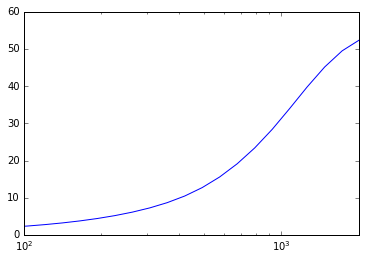

In [37]:
plt.figure()
plt.semilogx(Lmax,np.sqrt(np.asarray(result)*0.5/(2*np.pi**2)))
plt.xlim(100,2000)